# Dendritic Spine Finding Project, Part 1


In [1]:
# imports
import pandas as pd
import numpy as np
import os


In [7]:
# load in img/numeric file data
img_files = []
num_files = []

for _file in os.listdir('./train/img'):
    img_files.append(_file)
for _file in os.listdir('./train/labels'):
    num_files.append(_file)

print(img_files[:3])
print(num_files[:3])


['000001.jpg', '000002.jpg', '000003.jpg']
['000001.txt', '000002.txt', '000003.txt']


## Method 1: Using Matplotlib

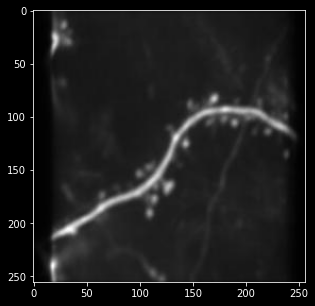

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from matplotlib.patches import Rectangle

# load, style, and display test img
img = mpimg.imread(f'./train/img/{img_files[0]}')
plt.style.use("dark_background")
figure(figsize=(5, 5))
testImg = plt.imshow(img)


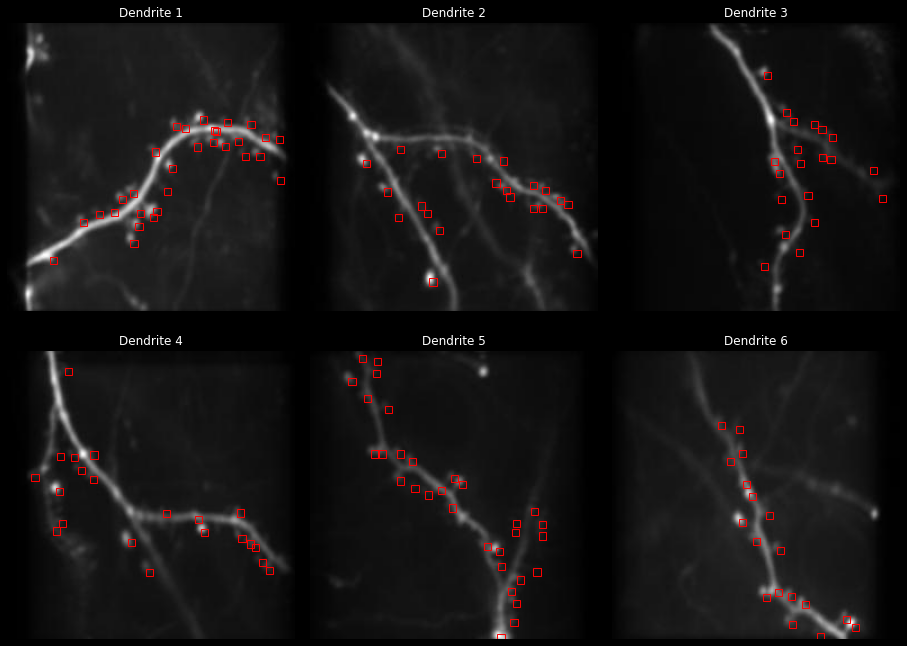

In [27]:
SCALE_FACTOR = 256
BOX_SIZE = 100

def display_images(img_files, num_files, idx=0, numShow=6):
  plt.figure(figsize=(16, 12))
  plt.subplots_adjust(wspace=0.05, hspace=0.01)

  for i, img in enumerate(img_files[:numShow]):
     plt.subplot(231 + idx)
     idx += 1
     img = mpimg.imread(f'./train/img/{img}')
     num_file = pd.read_csv(f'./train/labels/{num_files[i]}', skiprows=0,
                delim_whitespace=True, header=None, names=['Index', 'X', 'Y', 'W', 'H'])
     for j, spine in num_file.iterrows():
         plt.gca().add_patch(Rectangle((spine['X'] * SCALE_FACTOR, spine['Y'] * SCALE_FACTOR),
                                      spine['W'] * BOX_SIZE, spine['H'] * BOX_SIZE, linewidth=1, edgecolor='r', facecolor='none'))

     plt.title(f"Dendrite {i+1}")
     plt.imshow(img)
     plt.axis('off')

display_images(img_files, num_files)

## Method 2: using TensorFlow (somewhat functional?)
In progress

(256, 256, 3)


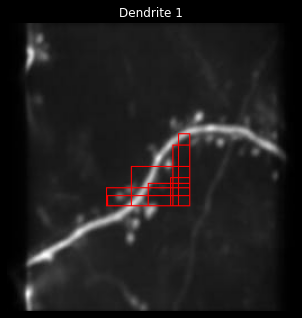

In [ ]:
import tensorflow as tf
from PIL import Image

def display_images_with_tf(img_files, num_files, idx=0, numShow=1):
  plt.figure(figsize=(16, 12))
  plt.subplots_adjust(wspace=0.05, hspace=0.01)

  for i, img in enumerate(img_files[:numShow]):
     plt.subplot(231 + idx)
     idx += 1
     img = tf.io.read_file(f'./data/paired/{img}')
     img = tf.image.decode_jpeg(img)
     img = tf.image.convert_image_dtype(
         img, dtype=tf.float32
     )
     colors = np.array([[1.0, 0.0, 0.0]])
     img = tf.expand_dims(img, axis=0)

     num_file = pd.read_csv(f'./data/paired/{num_files[i]}', skiprows=0, delim_whitespace=True, header=None, names=['Index', 'X', 'Y', 'W', 'H'])
     for j, spine in num_file.iterrows():
        box = np.array(
            [spine['X'], spine['Y'], spine['W'] * 10, spine['H'] * 10])
        img = tf.image.draw_bounding_boxes(images=img, boxes=box.reshape([1, 1, 4]), colors=colors)

     img = np.squeeze(img)
     print(img.shape)
     plt.title(f"Dendrite {i+1}")
     plt.imshow(img)
     plt.axis('off')
     plt.show()


display_images_with_tf(img_files, num_files)
